In [52]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

from epstein_civil_violence.agent import Citizen, Cop
from epstein_civil_violence.model import EpsteinCivilViolence

## Compare Steady State Graph

In [33]:
min_media_model = EpsteinCivilViolence(media_density=0.0)
max_media_model = EpsteinCivilViolence(media_density=0.1)
min_media_model.run_model()
max_media_model.run_model()

min_media = min_media_model.datacollector.get_model_vars_dataframe()
max_media = max_media_model.datacollector.get_model_vars_dataframe()

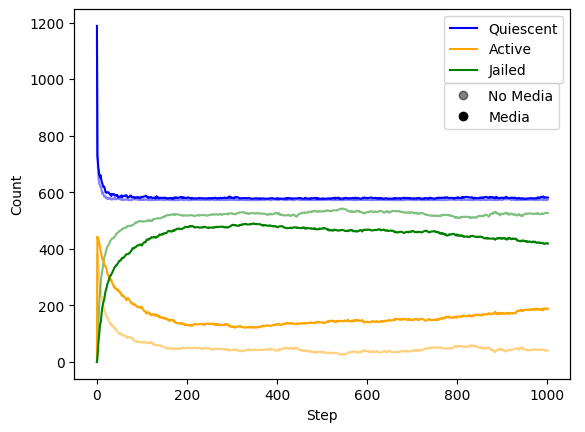

In [213]:
fig, ax1 = plt.subplots()
ax1.plot(min_media["Quiescent"],c='b',alpha=0.5)
ax1.plot(min_media['Active'],c='orange',alpha=0.5)
ax1.plot(min_media['Jailed'],c='green',alpha=0.5)

ax1.plot(max_media["Quiescent"], label="Quiescent",c='b')
ax1.plot(max_media['Active'], label="Active",c='orange')
ax1.plot(max_media['Jailed'], label="Jailed",c='green')

ax2 = ax1.twinx()
ax2.plot(np.NaN, np.NaN, marker='o', color='black',alpha=0.5, label='No Media', lw=0)
ax2.plot(np.NaN, np.NaN, marker='o', color='black', label='Media', lw=0)

ax1.set_xlabel('Step')
ax1.set_ylabel('Count')
ax1.legend()
ax2.legend(loc=(0.745, 0.675))
ax2.set_yticks([])

plt.savefig('citizen_condition.png', dpi=300, bbox_inches='tight')

In [119]:
min_media.tail(2)

,Quiescent,Active,Jailed
1000,573,40,527
1001,574,40,526


In [120]:
max_media.tail(2)

,Quiescent,Active,Jailed
1000,582,186,420
1001,581,189,418


In [115]:
np.where(min_media['Jailed'].diff().rolling(50).mean() < 0.25)[0][0]

141

In [140]:
quiescent, active, jailed, steps = [], [], [], []
for d in np.arange(0,0.1+0.01,0.01):
    q,a,j,s = [],[],[],[]
    for i in range(10):
        model = EpsteinCivilViolence(media_density=d)
        model.run_model()
        out = model.datacollector.get_model_vars_dataframe()
        q.append(out['Quiescent'].values[-1])
        a.append(out['Active'].values[-1])
        j.append(out['Jailed'].values[-1])
        s.append(np.where(out['Jailed'].diff().rolling(50).mean() < 0.25)[0][0])
    quiescent.append(np.mean(q))
    active.append(np.mean(a))
    jailed.append(np.mean(j))
    steps.append(np.mean(s))
outcome = pd.DataFrame({'Quiescent':quiescent,'Active':active,'Jailed':jailed,'Steps':steps},index=np.arange(0,0.1+0.01,0.01))

In [137]:
outcome.to_csv('outcome.csv')

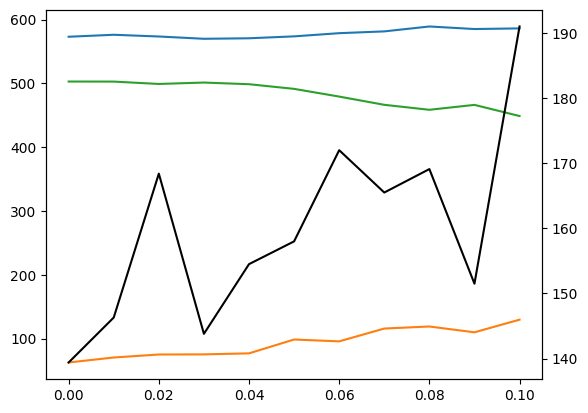

In [212]:
fig, ax = plt.subplots()
ax.plot(outcome['Quiescent'],label='Quiescent')
ax.plot(outcome['Active'],label='Active')
ax.plot(outcome['Jailed'],label='Jailed')

ax2 = ax.twinx()
ax2.plot(outcome['Steps'],label='Steps',c='black')

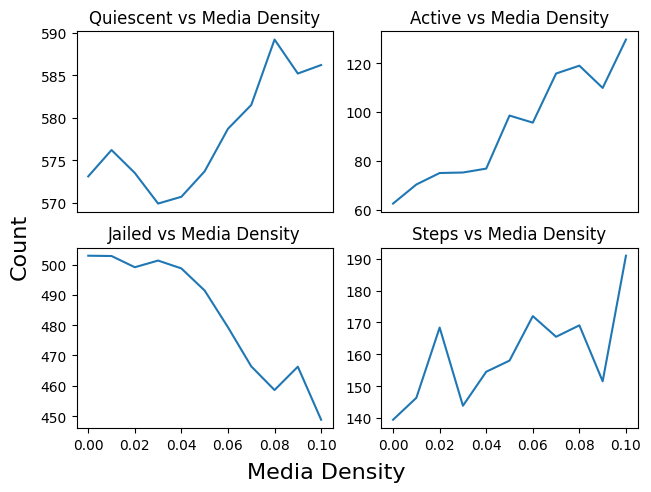

In [214]:
fig, ax = plt.subplots(2,2,constrained_layout=True)
for i,col in enumerate(outcome.columns):
    r, c = i//2, i%2
    ax[r][c].plot(outcome[col],label=col)
    if r == 0:
        ax[r][c].set_xticks([])
    ax[r][c].set_title(f'{col} vs Media Density')
    fig.supxlabel('Media Density', fontsize=16)
    fig.supylabel('Count', fontsize=16)

plt.savefig('wrt_media_density.png', dpi=300, bbox_inches='tight')

In [ ]:
model_out = model.datacollector.get_model_vars_dataframe()

Text(0, 0.5, 'Count')

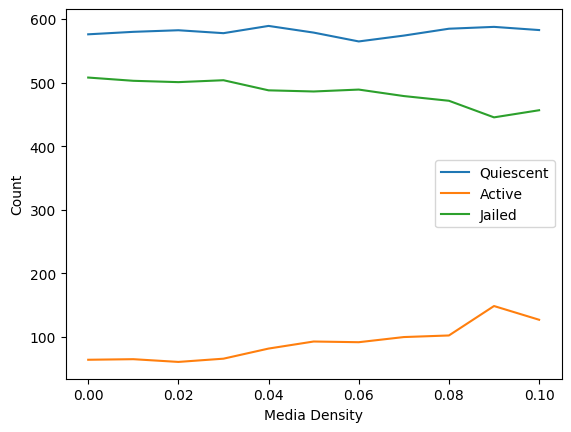

In [135]:
outcome.plot()
plt.xlabel('Media Density')
plt.ylabel('Count')